In [1]:
pip install torch-lucent

     |████████████████████████████████| 46 kB 272 kB/s            
     |████████████████████████████████| 829 kB 910 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 212 kB 833 kB/s            
     |████████████████████████████████| 225 kB 553 kB/s            
     |████████████████████████████████| 296 kB 595 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 98 kB 3.1 MB/s            
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=f45ae66871615c24a7137269584591236e87a31e0f1229f17bec5f8bfccf0290
  Stored in directory: /root/.cache/pip/wheels/6e/9c/ed/4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=e2c4766b1f914da8a17d55a8a2a5e85bf0a78069b6587374734ba6d78a977844
  Stored in directory: /root/.cache/pip/wheels/3f/2a/fa/4d7a888e69774d5e6e855d190a8a51b357d77cc05eb

In [72]:
import torch

from lucent.optvis import render, param, transform, objectives

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc3 = nn.Linear(394384, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc3(x))
        return x


net = Net()

In [4]:
net.load_state_dict(torch.load('fourcities_net.pth', map_location=device))

<All keys matched successfully>

In [5]:
net.to(device).eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc3): Linear(in_features=394384, out_features=10, bias=True)
)

In [47]:
net.conv2.weight.shape

torch.Size([16, 6, 5, 5])

In [56]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


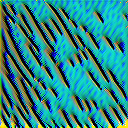

In [66]:
a = render.render_vis(net, "conv2:15", progress=False)[0]

In [60]:
a[0].shape

(128, 128, 3)

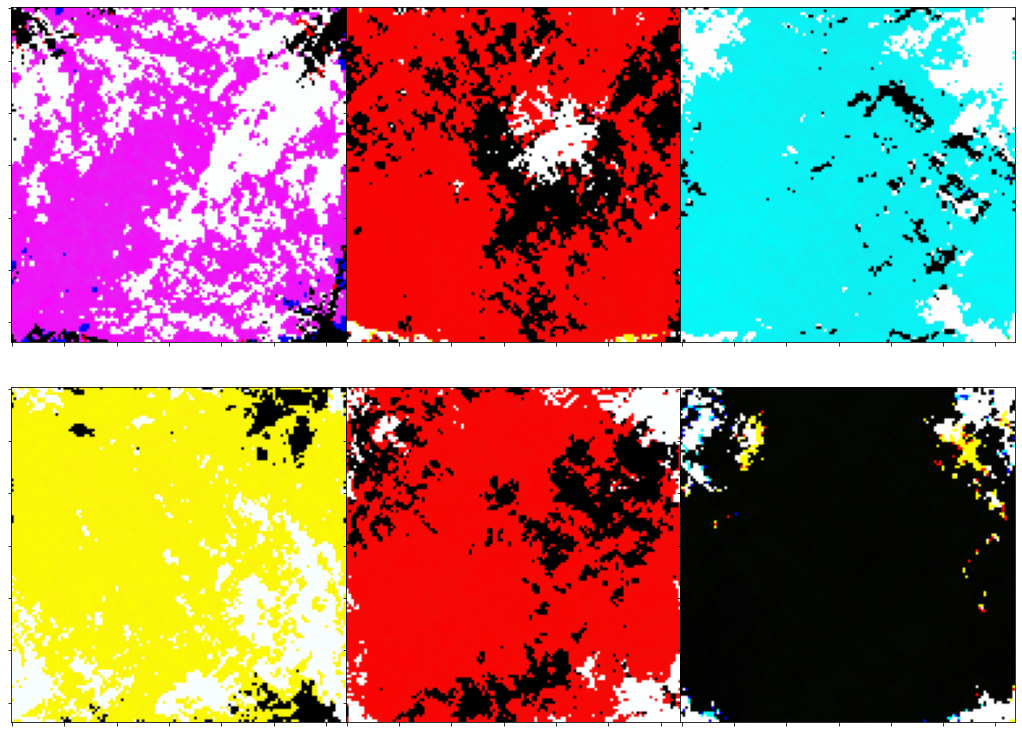

In [70]:
n_row = 2
n_col = 3
_, axs = plt.subplots(n_row, n_col, figsize=(18, 14))
axs = axs.flatten()
for ix, ax in zip(range(n_row*n_col), axs):
  img = render.render_vis(net, f"conv1:{ix}", progress=False, show_image=False)[0]
  #img = np.transpose(img, [0, 3, 2, 1])
  img = np.reshape(img, (128, 128, 3))
  ax.imshow(img)
  ax.set_xticklabels([])
  ax.set_yticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

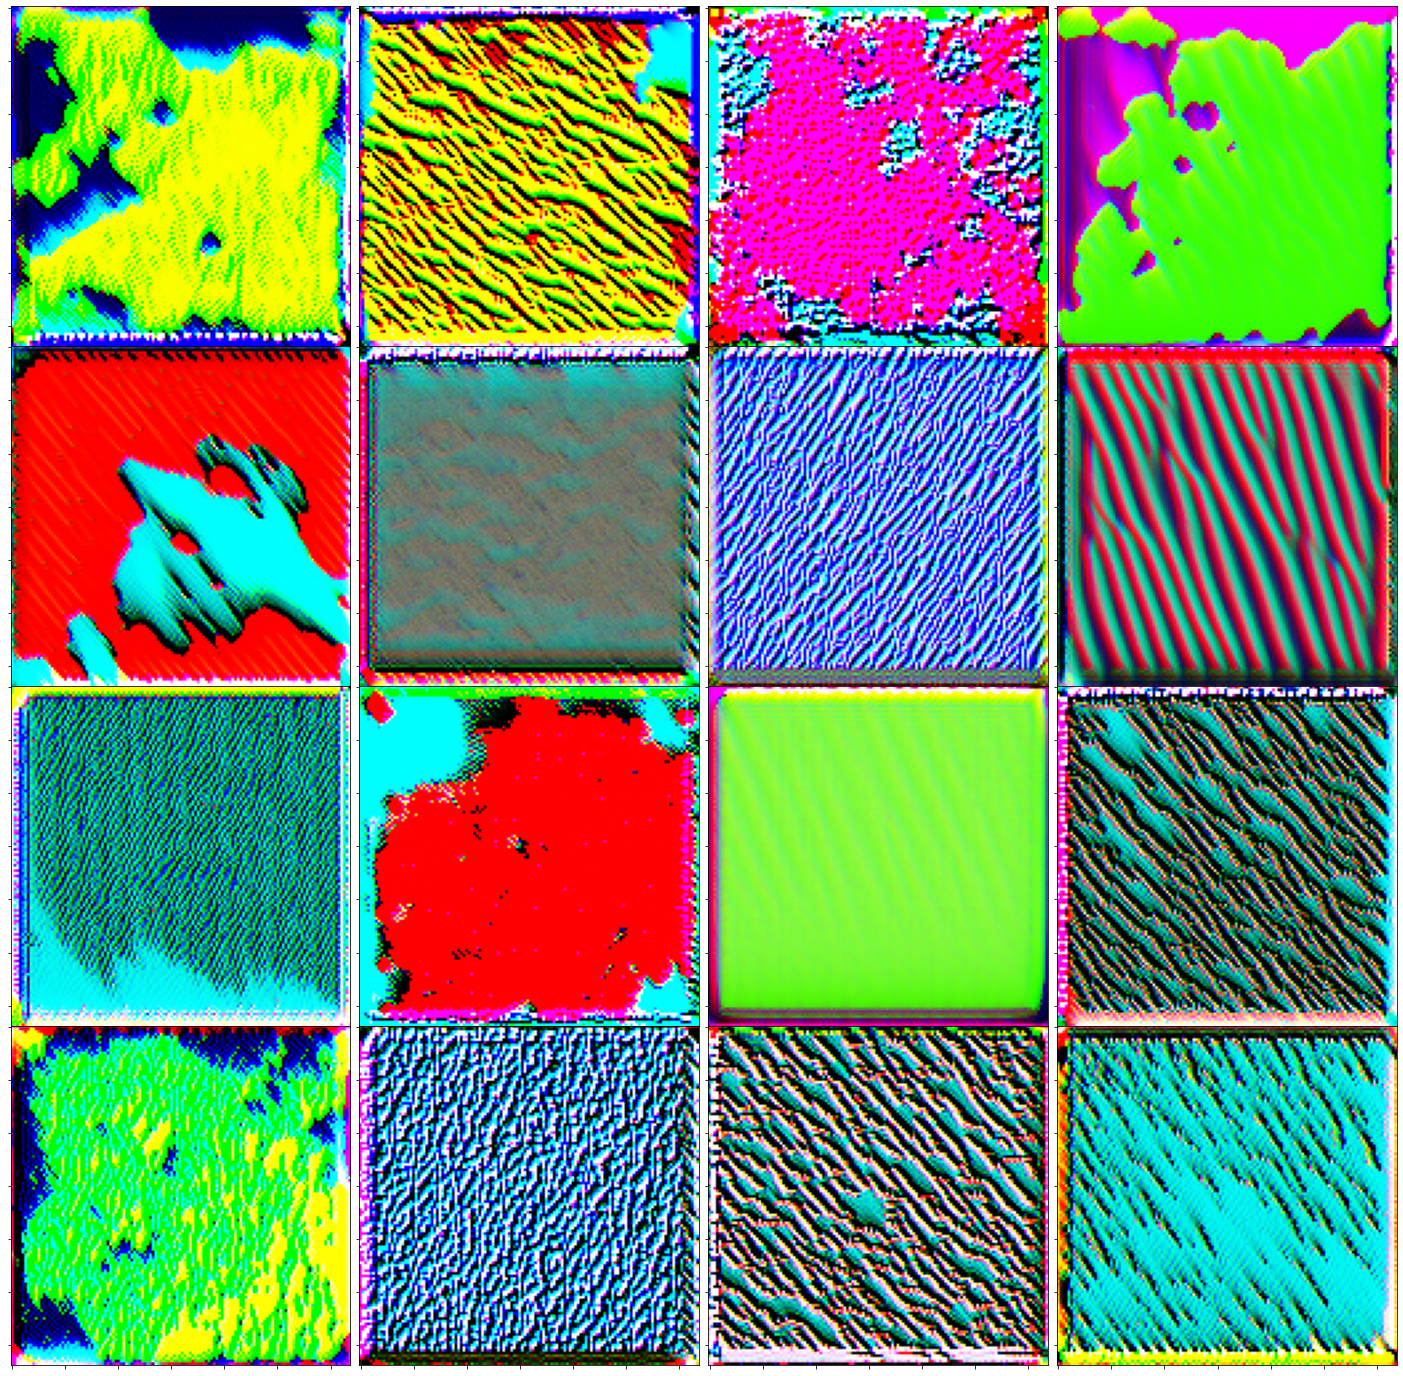

In [87]:
n_row = 4
n_col = 4
_, axs = plt.subplots(n_row, n_col, figsize=(25, 25))
axs = axs.flatten()
for ix, ax in zip(range(16), axs):
    param_f = lambda: param.image(128, fft=True, decorrelate=False)
    img = render.render_vis(net, f"conv2:{ix}", param_f, transforms=[], progress=False, show_image=False)[0]
    #img = np.transpose(img, [0, 3, 2, 1])
    img = np.reshape(img, (128, 128, 3))
    ax.imshow(img)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

100%|██████████| 512/512 [00:07<00:00, 70.04it/s]



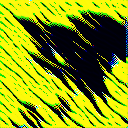

In [75]:
channel = lambda n: objectives.channel("conv2", n)
obj = channel(0) + channel(1)
_ = render.render_vis(net, obj, show_inline=True)